In [1]:
import numpy as np
import os
import sys
import copy

import torch
from torch import nn

import importlib

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.animation as anm

sys.path.insert(0, "../src/")
import data
import model
import train

import nmrglue as ng
import scipy
import scipy.io

np.random.seed(123)

In [2]:
name = "Compare_depth"
#name = "Compare_batch"

mods = ["Ensemble_PIPNet_2022_02_01_1_layers", "Ensemble_PIPNet_2022_02_01_2_layers",
        "Ensemble_PIPNet_2022_02_01_3_layers", "Ensemble_PIPNet_2022_02_01_4_layers",
        "Ensemble_PIPNet_2022_02_01_5_layers", "Ensemble_PIPNet_2022_02_01_6_layers",
        "Ensemble_PIPNet_2022_02_01_7_layers"]
#mods = ["Ensemble_PIPNet_2022_01_25_batch_1", "Ensemble_PIPNet_2022_01_25_batch_2",
#        "Ensemble_PIPNet_2022_01_25_batch_3", "Ensemble_PIPNet_2022_01_25_batch_4",
#        "Ensemble_PIPNet_2022_01_25_batch_5", "Ensemble_PIPNet_2022_01_25_batch_6",
#        "Ensemble_PIPNet_2022_01_25_batch_7", "Ensemble_PIPNet_2022_01_25_batch_8"]

labels = ["1 layer", "2 layers", "3 layers", "4 layers", "5 layers", "6 layers", "7 layers"]
#labels = ["1", "2", "3", "4", "5", "6", "7", "8"]

fig_dir = f"../figures/{name}/"

n_avg = 10

if not os.path.exists(fig_dir):
    os.mkdir(fig_dir)

In [3]:
avg_losses = []
min_losses = []
avg_val_losses = []
min_val_losses = []

avg_loss_components = []
min_loss_components = []
avg_val_loss_components = []
min_val_loss_components = []

for mod in mods:
    in_dir = f"../data/{mod}/"
    
    if not os.path.exists(in_dir):
        raise ValueError(f"Unknown model: {mod}")
    
    # Load loss and learning rate
    all_lrs = np.load(in_dir + "all_lrs.npy")
    all_losses = np.load(in_dir + "all_losses.npy")
    all_val_losses = np.load(in_dir + "all_val_losses.npy")

    try:
        all_loss_components = np.load(in_dir + "all_loss_components.npy")
        all_val_loss_components = np.load(in_dir + "all_val_loss_components.npy")
        mean_loss_components = np.mean(all_loss_components, axis=1)
        mean_val_loss_components = np.mean(all_val_loss_components, axis=1)
    except:
        all_loss_components = None
        all_val_loss_components = None
        mean_loss_components = None
        mean_val_loss_components = None

    mean_losses = np.mean(all_losses, axis=1)
    mean_val_losses = np.mean(all_val_losses, axis=1)
    
    avg_losses.append(np.mean(mean_losses[-n_avg:]))
    min_losses.append(np.min(mean_losses))
    
    avg_val_losses.append(np.mean(mean_val_losses[-n_avg:]))
    min_val_losses.append(np.min(mean_val_losses))
    
    avg_loss_components.append(np.mean(mean_loss_components[-n_avg:], axis=0))
    min_loss_components.append(np.min(mean_loss_components, axis=0))
    avg_val_loss_components.append(np.mean(mean_val_loss_components[-n_avg:], axis=0))
    min_val_loss_components.append(np.min(mean_val_loss_components, axis=0))

avg_loss_components = np.array(avg_loss_components)
min_loss_components = np.array(min_loss_components)
avg_val_loss_components = np.array(avg_val_loss_components)
min_val_loss_components = np.array(min_val_loss_components)

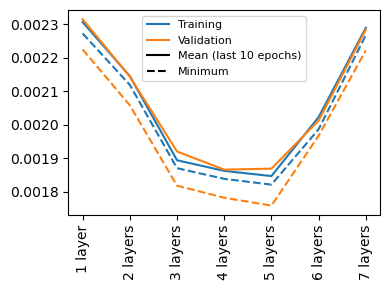

In [4]:
fig = plt.figure(figsize=(4,3))
ax = fig.add_subplot(1,1,1)

ax.plot(avg_losses, "C0")
ax.plot(min_losses, "--C0")
ax.plot(avg_val_losses, "C1")
ax.plot(min_val_losses, "--C1")

hs = []
legs = ["Training", "Validation", f"Mean (last {n_avg} epochs)", "Minimum"]

hs.append(mpl.lines.Line2D([0], [0], color="C0"))
hs.append(mpl.lines.Line2D([0], [0], color="C1"))
hs.append(mpl.lines.Line2D([0], [0], color="k"))
hs.append(mpl.lines.Line2D([0], [0], color="k", linestyle="--"))

ax.set_xticks(range(len(avg_losses)))
ax.set_xticklabels(labels, rotation=90)

ax.legend(hs, legs, fontsize=8)

fig.tight_layout()
plt.savefig(f"{fig_dir}losses.pdf")

plt.show()
plt.close()

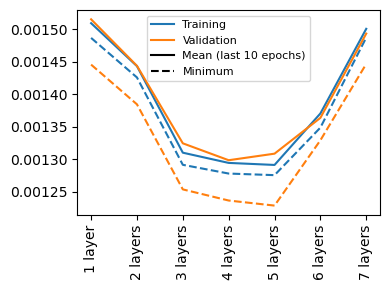

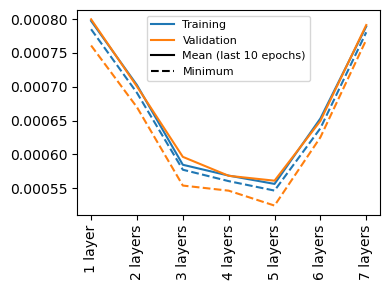

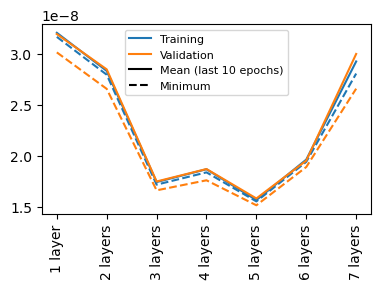

In [5]:
for i in range(avg_loss_components.shape[1]):

    fig = plt.figure(figsize=(4,3))
    ax = fig.add_subplot(1,1,1)

    ax.plot(avg_loss_components[:, i], "C0")
    ax.plot(min_loss_components[:, i], "--C0")
    ax.plot(avg_val_loss_components[:, i], "C1")
    ax.plot(min_val_loss_components[:, i], "--C1")

    hs = []
    legs = ["Training", "Validation", f"Mean (last {n_avg} epochs)", "Minimum"]

    hs.append(mpl.lines.Line2D([0], [0], color="C0"))
    hs.append(mpl.lines.Line2D([0], [0], color="C1"))
    hs.append(mpl.lines.Line2D([0], [0], color="k"))
    hs.append(mpl.lines.Line2D([0], [0], color="k", linestyle="--"))

    ax.set_xticks(range(len(avg_losses)))
    ax.set_xticklabels(labels, rotation=90)
    
    ax.legend(hs, legs, fontsize=8)

    fig.tight_layout()
    plt.savefig(f"{fig_dir}loss_component_{i}.pdf")

    plt.show()
    plt.close()